# Text Messages - Spam vs Ham (NLP)

By: Andrew Wairegi

**Definition:**

Word counts for each word

## 1. Defining the Question 

<a name = "defining_question">

### a) Specifying the question

To determine if a text message is Spam/Not.

### b) Defining Metric for success

To get a model with an accuracy of atleast 80%.

### c) Understanding the context

Many messages on phones are spam / Ham. We need to create a model that will allow us to determine whether a message is Spam/Ham. This will allow software companies with text message filters. To determine whether a message is spam/not.

### d) Experimental design

**Process:**

1. <a href = "#defining_question">  Defining the question </aa>
2. <a href = "#data_loading"> Reading the Data </a>
3.  <a href = "#previewing_data"> Previewing Data </a>
4. <a href = "#cleaning_data"> Data Cleaning </a>
5. <a href = "#EDA"> Exploratory Data analysis (EDA) </a> 
6. <a href = "#train_test"> Train Test split </a>
7. <a href = "#data_preparation"> Data Preparation </a>
6. <a href = "#implementing_solution"> Implementing the solution </a>
8. <a href = "#conclusion"> Conclusion </a>
9. <a href = "#recommendation">  Recommendations </a>
10. <a href = "#follow_questions">  Follow up questions </a>

### e) Data relevance

The data is valid because it is sourced from an official source, the federal university of Sao Carlos. Which means that the dataset has been sourced from an official place. It is most likely text messages, from a network service provider.

## 2. Reading the data

<a name="data_loading"/>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install nltk
import nltk 

In [ ]:
# nltk.download()

In [ ]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
messages_df = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])

## 3. Previewing the data

<a name = "previewing_data"/>

In [ ]:
for message in messages[0:8]:
  print(message)

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


In [ ]:
len(messages)

5574

In [ ]:
messages_df.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

## 4. Cleaning the Data

<a name = "cleaning_data">

In [ ]:
# No cleaning needs to be done since there are no null values in the text message dataset.

**Feature engineering**

In [ ]:
messages_df['length'] = messages_df['message'].apply(len)

## 5. Exploratory Data analysis

<a name = "EDA">

In [ ]:
messages_df.describe()

label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

Looking at the general, description of the messages dataset.

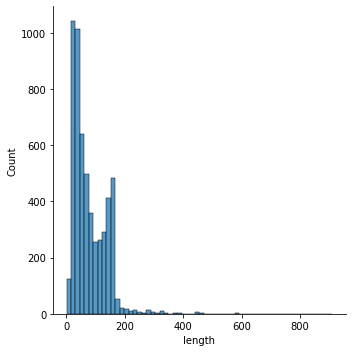

In [ ]:
sns.displot(data = messages_df, x = "length", bins = 60)

Most messages were around 40 words in count. Which means most people send, short messages.

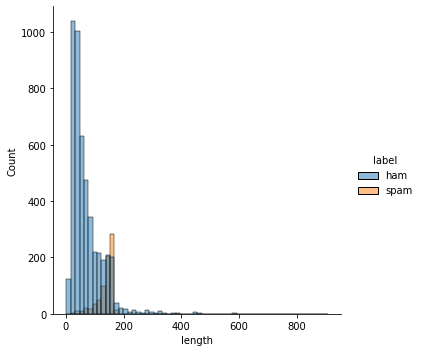

In [ ]:
sns.displot(data = messages_df, x = "length", bins = 60, hue = "label")

Most of the messages, that were longer than the ham messages, were spam. Which means it's easier to identify a spam message with that.

In [ ]:
messages_df.head()

label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

Checking out the length of each message.

## 6. Train Test split

<a name = "train_test">

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = messages_df[["message", "length"]]
y = messages_df["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(3733, 2)

## 7. Data Preparation

<a name = "data_preparation">



In [ ]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
from sklearn.pipeline import FeatureUnion

In [ ]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation] # Remove punctuation
    nopunc = ''.join(nopunc) # Join the characters to form string.
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] # Remove stopwords

In [ ]:
# Bow Transformer
bow_transformer = CountVectorizer(analyzer=text_process) # Get objects
bow_transformer2 = CountVectorizer(analyzer=text_process)

bow_transformer.fit(X_train["message"])
bow_transformer2.fit(X_test["message"])

bow_transformer = FeatureUnion([("prev_trans", bow_transformer), ("new_trans", bow_transformer2)]) # Combine

X_train_messages_bow = bow_transformer.transform(X_train["message"]) # Note: they must have the same shapes
X_test_messages_bow = bow_transformer.transform(X_test["message"])

In [ ]:
print('Shape of Bag of words (X_train): ', X_train_messages_bow.shape)

Shape of Bag of words (X_train):  (3733, 14844)


In [ ]:
print('Number of Non-zero occurences (X_train): ', X_train_messages_bow.nnz)

Number of Non-zero occurences (X_train):  60513


In [ ]:
# Non-zero entries. Remember not every message, has every word.

In [ ]:
# Tfidf transformer - document
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_messages_bow) # Note: they have the same word counts.
X_train_tfidf = tfidf_transformer.transform(X_train_messages_bow)
X_test_tfidf = tfidf_transformer.transform(X_test_messages_bow)

In [ ]:
# Confirming shape
print(X_train_tfidf.shape)

(3733, 14844)


## 8. Implementing the Solution

<a name = "implementing_solution">

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
Spam_detection_model = MultinomialNB()

In [ ]:
Spam_detection_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
predictions = Spam_detection_model.predict(X_test_tfidf)

In [ ]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.99      1641
        spam       0.80      1.00      0.89       198

    accuracy                           0.97      1839
   macro avg       0.90      0.99      0.94      1839
weighted avg       0.98      0.97      0.98      1839



## Conclusions

<a name = "conclusion">

In conclusion the model performed well. We were able to get an accuracy of 80%, for spam messages. Which is good. While we got 100% accuracy for ham text messages. Which is good. That means that our model performed well, and that it can be used in software as a text message filter with an accuracy of over 80%.

## Recommendations

<a name = "recommendation">

I recommend that the text message agency. Uses this model, as it was able to detect spam messages with an accuracy of 80%. Which is good. This will allow them to detect spam messages on phones, very quickly without the need for a user to report a message as spam. However users should still report messages as spam, as it would be good to detect new messages as spam as well.

## 11. Follow up questions

<a name = "follow_questions">

### a) Did we have the right data ?

I believe we had the right data because we were trying to determine whether a text message was spam/not. This means that this is the right data. As it is spam/ham messages with labels of whether a text message is spam/not.

### b) Do we need other data to answer our question ?

No, as we had an accuracy of 80% for spam messages, which means that we had the right data.

### c) Did we have the right question ?

Yes, as we wanted to determine whether a text message was spam / not. This means that we had the right question.

<br>
<center> <h4> <b> Copyright © Andrew Wairegi </b> </h4> </center>

